In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
m = pd.read_csv("cleaned_movie_withNLP (1).csv")
m.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'budget',
       'genres', 'homepage', 'original_language', 'original_title', 'overview',
       ...
       'Keywords_superhero', 'Keywords_suspense', 'Keywords_teenager',
       'Keywords_vampire', 'Keywords_violence', 'Keywords_war',
       'Keywords_witch', 'Keywords_woman director', 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood'],
      dtype='object', length=118)

In [4]:
#somehow for the jungle book & anther movie the year is wrong but 
#its fixable
m['release_date'] = pd.to_datetime(m['release_date']).dt.date.astype(str)
m['release_date'].head()

0    2012-06-09
1    2007-10-17
2    1998-11-25
3    2017-02-15
4    2011-09-30
Name: release_date, dtype: object

In [0]:
#dummifiying it 
#movie_drop['release_date'].str.split("-", n=1, expand=True)
m1 = m['release_date'].str.split('-', n=1, expand=True)
#m['release_year'] = m1[0]

m2 = m1[1].str.split('-', n=1, expand=True)

m['release_month'] = m2[0]

m['release_day'] = m2[1]


In [6]:
m.loc[:, ['release_day','release_month','release_date']].head()

,release_day,release_month,release_date
0,09,06,2012-06-09
1,17,10,2007-10-17
2,25,11,1998-11-25
3,15,02,2017-02-15
4,30,09,2011-09-30


In [8]:
#checking the top titles
title = m.loc[:,['title','popularity']]
top10_title = title.nlargest(10,'popularity')
top10_title

,title,popularity
231,The Hunger Games: Mockingjay - Part 1,147.098006
74,Ghost in the Shell,68.726676
242,The Legend of Tarzan,45.382980
58,Doctor Strange,43.847654
198,Suicide Squad,42.965027
192,Star Wars,42.149697
162,Rise of the Planet of the Apes,41.613762
27,Before I Fall,38.995136
167,Rogue One: A Star Wars Story,36.567575
119,Lucy,36.447603


Text(0.5, 1.0, 'Popularity vs Runtime')

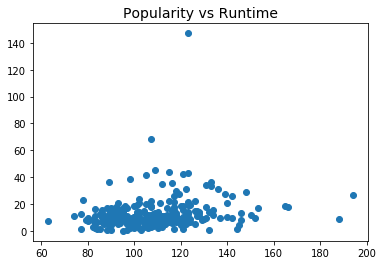

In [9]:
#checking the runtime 
plt.scatter(m['runtime'],m['popularity'])
plt.title('Popularity vs Runtime',fontsize=14)

Text(0.5, 1.0, 'Popularity based on day')

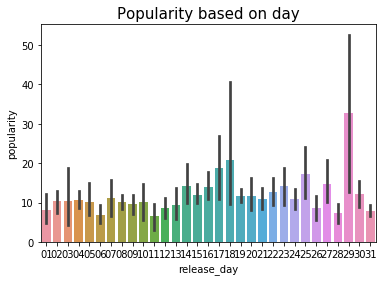

In [57]:
sns.barplot(x='release_day', y='popularity', data=m)
plt.title('Popularity based on day', fontsize=15)


Text(0.5, 1.0, 'Popularity based on Months')

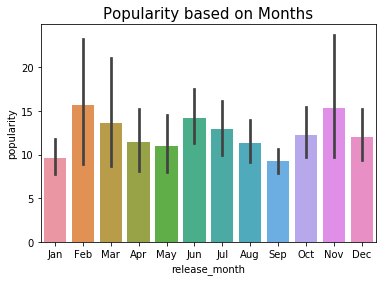

In [55]:
#plt.figure(figsize=(10,15))
sns.barplot(x='release_month', y='popularity', data=m)
plt.gca().set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                     'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Popularity based on Months', fontsize=15)

In [0]:
#replacing the odd years
#m['release_year'].replace(to_replace=['2067','2037'],value=['1967','1937'], inplace=True)
#m['release_year'].sort_values(ascending=True).head()

In [24]:
#getting the top 10 production companies
p = m.drop(columns=['budget','original_language',
                                  'genres','overview',
                                  'popularity','production_companies',
                                  'release_date','runtime','tagline',
                                 'title','Keywords',
                                 'Keywords_superhero', 'Keywords_suspense', 'Keywords_teenager',
       'Keywords_vampire', 'Keywords_violence', 'Keywords_war',
       'Keywords_witch', 'Keywords_woman director', 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood',
      'The sum of genres', 'production_companies_Amblin Entertainment',
       'The sum of production_companies',
       'Keywords_3d', 'Keywords_aftercreditsstinger', 'Keywords_airplane',
       'Keywords_alcohol', 'Keywords_alcoholism', 'Keywords_alien',
       'Keywords_based on comic', 'Keywords_based on novel',
       'Keywords_based on true story', 'Keywords_based on young adult novel',
       'Keywords_biography', 'Keywords_cia', 'Keywords_daughter',
       'Keywords_drug', 'Keywords_duringcreditsstinger',
       'Keywords_dying and death', 'Keywords_dystopia', 'Keywords_england',
       'Keywords_family', 'Keywords_female nudity', 'Keywords_fight',
       'Keywords_friendship', 'Keywords_gore', 'Keywords_high school',
       'Keywords_imax', 'Keywords_independent film', 'Keywords_infidelity',
       'Keywords_island', 'Keywords_jealousy', 'Keywords_london england',
       'Keywords_love', 'Keywords_magic', 'Keywords_marvel comic',
       'Keywords_monster', 'Keywords_murder', 'Keywords_musical',
       'Keywords_nudity', 'Keywords_paris', 'Keywords_party',
       'Keywords_prison', 'Keywords_remake', 'Keywords_revenge',
       'Keywords_robot', 'Keywords_secret', 'Keywords_secret identity',
       'Keywords_sequel', 'Keywords_sex', 'Keywords_sport',
       'production_countries', 'cast', 'crew',
       'genres_Action', 'genres_Adventure', 'genres_Animation',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Family', 'genres_Fantasy', 'genres_History', 'genres_Horror',
       'genres_Music', 'genres_Mystery', 'genres_Romance',
       'genres_Science Fiction', 'genres_Thriller', 'genres_War',
       'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'homepage',
       'original_title', 'spoken_languages','release_month', 'release_day'])
p.columns

Index(['production_companies_Columbia Pictures',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_Dark Horse Entertainment',
       'production_companies_DreamWorks Animation',
       'production_companies_DreamWorks SKG',
       'production_companies_Dune Entertainment',
       'production_companies_Legendary Pictures',
       'production_companies_Lionsgate',
       'production_companies_New Line Cinema',
       'production_companies_Paramount Pictures',
       'production_companies_Relativity Media',
       'production_companies_Summit Entertainment',
       'production_companies_The Weinstein Company',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Universal Pictures',
       'production_companies_Village Roadshow Pictures',
       'production_companies_Walden Media',
       'production_companies_Walt Disney Pictures',
       'production_companies_Warner Bros.'],
      dtype='object')

In [26]:
#getting top production companies
production_sum = p.sum()
production_sum

production_companies_Columbia Pictures                         16
production_companies_Columbia Pictures Corporation              7
production_companies_Dark Horse Entertainment                   5
production_companies_DreamWorks Animation                       6
production_companies_DreamWorks SKG                             5
production_companies_Dune Entertainment                         6
production_companies_Legendary Pictures                         8
production_companies_Lionsgate                                  7
production_companies_New Line Cinema                            5
production_companies_Paramount Pictures                        22
production_companies_Relativity Media                          15
production_companies_Summit Entertainment                      10
production_companies_The Weinstein Company                      7
production_companies_Twentieth Century Fox Film Corporation    12
production_companies_Universal Pictures                        19
production

In [27]:
top5_pc = production_sum.nlargest(5)
top5_pc

production_companies_Warner Bros.          26
production_companies_Paramount Pictures    22
production_companies_Universal Pictures    19
production_companies_Columbia Pictures     16
production_companies_Relativity Media      15
dtype: int64

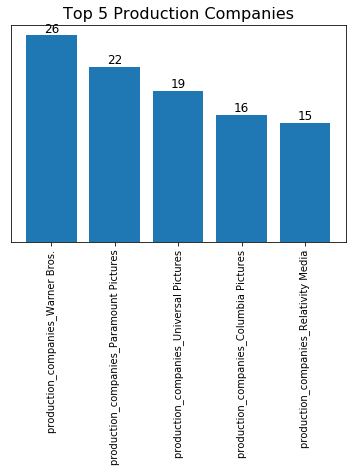

In [28]:
plt.bar(top5_pc.index, top5_pc)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('Top 5 Production Companies', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

In [46]:
#fincing top keywords
keyword = m.drop(columns=['budget','original_language',
                                  'genres','overview',
                                  'popularity','production_companies',
                                  'release_date','runtime','tagline',
                                 'title','Keywords',
                                 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood',
      'The sum of genres', 'production_companies_Amblin Entertainment',
       'The sum of production_companies',
       'production_countries', 'cast', 'crew',
       'genres_Action', 'genres_Adventure', 'genres_Animation',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Family', 'genres_Fantasy', 'genres_History', 'genres_Horror',
       'genres_Music', 'genres_Mystery', 'genres_Romance',
       'genres_Science Fiction', 'genres_Thriller', 'genres_War',
       'production_companies_Columbia Pictures',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_Dark Horse Entertainment',
       'production_companies_DreamWorks Animation',
       'production_companies_DreamWorks SKG',
       'production_companies_Dune Entertainment',
       'production_companies_Legendary Pictures',
       'production_companies_Lionsgate',
       'production_companies_New Line Cinema',
       'production_companies_Paramount Pictures',
       'production_companies_Relativity Media',
       'production_companies_Summit Entertainment',
       'production_companies_The Weinstein Company',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Universal Pictures',
       'production_companies_Village Roadshow Pictures',
       'production_companies_Walden Media',
       'production_companies_Walt Disney Pictures',
       'production_companies_Warner Bros.','Unnamed: 0', 'Unnamed: 0.1', 
        'Unnamed: 0.1.1', 'id', 'homepage',
       'original_title', 'spoken_languages','release_month',
       'release_day', 'prod_countries', 'director', 'actor_1', 'actor_2'])
keyword.columns

Index(['Keywords_3d', 'Keywords_aftercreditsstinger', 'Keywords_airplane',
       'Keywords_alcohol', 'Keywords_alcoholism', 'Keywords_alien',
       'Keywords_based on comic', 'Keywords_based on novel',
       'Keywords_based on true story', 'Keywords_based on young adult novel',
       'Keywords_biography', 'Keywords_cia', 'Keywords_daughter',
       'Keywords_drug', 'Keywords_duringcreditsstinger',
       'Keywords_dying and death', 'Keywords_dystopia', 'Keywords_england',
       'Keywords_family', 'Keywords_female nudity', 'Keywords_fight',
       'Keywords_friendship', 'Keywords_gore', 'Keywords_high school',
       'Keywords_imax', 'Keywords_independent film', 'Keywords_infidelity',
       'Keywords_island', 'Keywords_jealousy', 'Keywords_london england',
       'Keywords_love', 'Keywords_magic', 'Keywords_marvel comic',
       'Keywords_monster', 'Keywords_murder', 'Keywords_musical',
       'Keywords_nudity', 'Keywords_paris', 'Keywords_party',
       'Keywords_prison', 'Keywor

In [47]:
keyword_sum = keyword.sum()
keyword_sum

Keywords_3d                            17
Keywords_aftercreditsstinger           19
Keywords_airplane                       5
Keywords_alcohol                        5
Keywords_alcoholism                     5
Keywords_alien                         10
Keywords_based on comic                 9
Keywords_based on novel                21
Keywords_based on true story            5
Keywords_based on young adult novel     7
Keywords_biography                      9
Keywords_cia                            5
Keywords_daughter                       5
Keywords_drug                           6
Keywords_duringcreditsstinger          38
Keywords_dying and death               10
Keywords_dystopia                      10
Keywords_england                        5
Keywords_family                         5
Keywords_female nudity                  5
Keywords_fight                          5
Keywords_friendship                     9
Keywords_gore                           5
Keywords_high school              

In [49]:
top_keywords = keyword_sum.nlargest(6)
top_keywords

Keywords_duringcreditsstinger    38
Keywords_based on novel          21
Keywords_woman director          21
Keywords_aftercreditsstinger     19
Keywords_3d                      17
Keywords_sequel                  14
dtype: int64

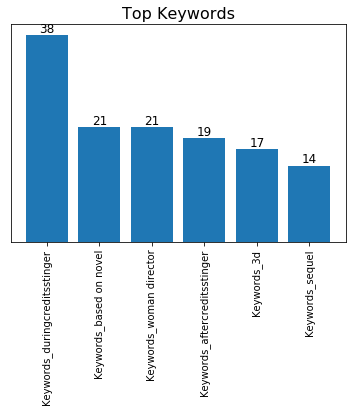

In [50]:
plt.bar(top_keywords.index, top_keywords)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('Top Keywords', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

In [0]:
#getting production coutries/locations
p1 = m['production_countries'].str.split('name', n=1, expand=True)
p2 = p1[1].str.split(":", n=1, expand=True)
p3 = p2[1].str.split(":",n=1, expand=True)
p4 = p3[0].str.split("'", n=1, expand=True)
p5 = p4[1].str.split("'", n=1, expand=True)

m['prod_countries'] = p5[0]

In [0]:
#getting director from crew

d1 = m['crew'].str.split('Director',n=1,expand=True)
d2 = d1[1].str.split("name",n=1,expand=True)
d3 = d2[1].str.split(':',n=1,expand=True)
d4 = d3[1].str.split(',',n=1,expand=True)
d5 = d4[0].str.split("'",n=1,expand=True)
d6 = d5[1].str.split("'", n=1, expand=True)
m['director'] = d6[0]

In [31]:
m.loc[:,['director','popularity']].head()

,director,popularity
0,Isabelle Guay,18.108408
1,David Slade,8.764548
2,Andrew Stanton,16.869209
3,Gore Verbinski,13.284360
4,David Cronenberg,9.865944


In [0]:
## getting the 2 main actors
cast_1 = m['cast'].str.split("name",n=1, expand=True)
str1 = cast_1[1].str.split(":", n=1, expand=True)
str2 = str1[1].str.split(",", n=1, expand=True)
str3 = str2[0].str.split("'", n=1, expand=True)
str4 = str3[1].str.split("'", n=1, expand=True)

#str4.head()
m['actor_1'] = str4[0]
#movie_drop['actor_1'].head()

str5 = str2[1].str.split("name", n=1, expand=True)
str6 = str5[1].str.split(":", n=1, expand=True)
str7 = str6[1].str.split(",", n=1, expand=True)
str8 = str7[0].str.split("'", n=1, expand=True)
str9 = str8[1].str.split("'", n=1, expand=True)

m['actor_2'] = str9[0]

In [37]:
m.loc[:,['actor_1','actor_2']].head()

,actor_1,actor_2
0,Gerard Butler,Lena Headey
1,Josh Hartnett,Melissa George
2,Kevin Spacey,Julia Louis-Dreyfus
3,Dane DeHaan,Jason Isaacs
4,Keira Knightley,Viggo Mortensen


In [38]:
m.isnull().sum()

Unnamed: 0                                                    0
Unnamed: 0.1                                                  0
Unnamed: 0.1.1                                                0
id                                                            0
budget                                                        0
genres                                                        0
homepage                                                      0
original_language                                             0
original_title                                                0
overview                                                      0
popularity                                                    0
production_companies                                          0
production_countries                                          0
release_date                                                  0
runtime                                                       0
spoken_languages                        

In [0]:
m['actor_1'].fillna('no_actor', inplace=True)
m['actor_2'].fillna('no_actor',inplace=True)

In [0]:
#changing the original language as it isnt clear
m.replace({'en': 'English','fr':'French','ko':'Korean',
               'ja': 'Japanese','ca': 'Catalan','zh':'Chinese',
               'th':'Thai','sv':'Swedish','hi':'Hindi','es':'Spanish',
               'de':'German'}, inplace=True)

In [41]:
m['original_language'].head()

0    English
1    English
2    English
3    English
4    English
Name: original_language, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

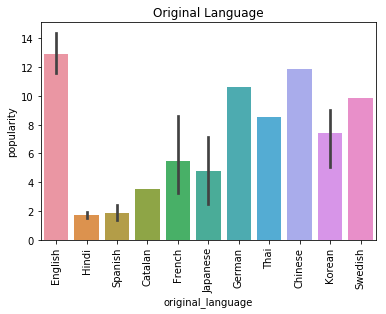

In [42]:
sns.barplot(y='popularity',x='original_language',data=m)
plt.title('Original Language')
plt.xticks(rotation=90)

In [58]:
#drop unnecessary columns
def drop_cols(df):
  return df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 
                          'id','homepage','original_title','overview',
                          'spoken_languages', 'title', 'tagline',
                          'Keywords','genres','production_companies',
                          'production_countries','cast','crew',
                          'release_date','The sum of production_companies',
                          'The sum of Keywords', 'The sum of genres',
             'Director_name(if more than 2 for the moive)_Clint Eastwood'])
m_drop = drop_cols(m.copy())
m_drop.columns

Index(['budget', 'original_language', 'popularity', 'runtime', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary',
       ...
       'Keywords_violence', 'Keywords_war', 'Keywords_witch',
       'Keywords_woman director', 'release_month', 'release_day',
       'prod_countries', 'director', 'actor_1', 'actor_2'],
      dtype='object', length=103)

In [0]:
m_drop.to_csv('m_final.csv')
from google.colab import files
files.download('m_final.csv')

In [60]:
m1 = pd.get_dummies(m_drop)
m1 = m1.drop(columns=['actor_2_no_actor', 'actor_1_no_actor'])
m1.columns

Index(['budget', 'popularity', 'runtime', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama',
       ...
       'actor_2_Warren Christie', 'actor_2_Will Smith',
       'actor_2_William Ackman', 'actor_2_William H. Macy',
       'actor_2_Woody Harrelson', 'actor_2_Zac Efron',
       'actor_2_Zachary Quinto', 'actor_2_Zooey Deschanel',
       'actor_2_ichirou Miki"', 'actor_2_√ìscar Jaenada'],
      dtype='object', length=946)

In [61]:
#removing low frequency columns 
sum_df = m1.sum()
list_col = list(m1)

counter = 0
for x in sum_df:
  if x < 2:
    m1.pop(list_col[counter])
  counter=counter+1

m1.columns

Index(['budget', 'popularity', 'runtime', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama',
       ...
       'actor_2_Kristen Bell', 'actor_2_Lena Headey', 'actor_2_Margot Robbie',
       'actor_2_Meryl Streep', 'actor_2_Morgan Freeman',
       'actor_2_Natalie Portman', 'actor_2_Philip Seymour Hoffman',
       'actor_2_Robert Pattinson', 'actor_2_Samuel L. Jackson',
       'actor_2_Theo James'],
      dtype='object', length=238)

In [0]:
y = m1.pop('popularity')
x = sm.add_constant(m1.astype(float))
model = sm.OLS(y,x).fit()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     1.790
Date:                Mon, 29 Apr 2019   Prob (F-statistic):            0.00404
Time:                        12:26:42   Log-Likelihood:                -832.66
No. Observations:                 291   AIC:                             2125.
Df Residuals:                      61   BIC:                             2970.
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [0]:
from week2_helpers import variance_inflation_factor

# Calculate VIF values for each column.
vif = variance_inflation_factor(x)

"""You shouldn't need to modify the code below (unless you change variable names)"""
#df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues, "vif": vif["vif"]})
#df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
#df_coeffs_sorted.style.bar(subset = ["Coefficients", "p"], align='mid', color=['#d65f5f', '#5fba7d'])


df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues, "vif": vif["vif"]})
df_coeffs = df_coeffs.drop("const", axis=0)
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1034: RuntimeWarning: invalid value encountered in true_divide
  normed = width * (s.values - smin) / (smax - smin + 1e-12)


,Coefficients,p,vif
Keywords_based on young adult novel,27.0622,0.00127511,5.13325
actor_2_Theo James,-21.8854,0.00330815,2.76181e-35
actor_1_Shailene Woodley,-21.8854,0.00330815,inf
Keywords_war,31.9542,0.0038546,6.50838
actor_1_Dwayne Johnson,29.7869,0.0128485,3.14068
actor_1_Scarlett Johansson,46.8686,0.0274952,5.94096e-35
Keywords_dystopia,17.6737,0.0276036,6.93383
release_month_10,6.60768,0.0414556,4.90489e+10
Keywords_murder,-15.6854,0.075106,5.09841e-35
release_day_25,10.492,0.0859618,1.74953e+10


In [0]:
df_vif = x.loc[:, vif["vif"] <= 5]

# Complete this
x_vif = sm.add_constant(df_vif.astype(float))
model_vif = sm.OLS(y, x_vif).fit()

print(model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     1.626
Date:                Mon, 29 Apr 2019   Prob (F-statistic):            0.00175
Time:                        12:26:43   Log-Likelihood:                -1012.1
No. Observations:                 291   AIC:                             2278.
Df Residuals:                     164   BIC:                             2745.
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
vif = variance_inflation_factor(df_vif.astype(float))

df_coeffs = pd.DataFrame({"Coefficients": model_vif.params, "p": model_vif.pvalues, "vif": vif["vif"]})
df_coeffs = df_coeffs.drop("const", axis=0)
df_coeffs = df_coeffs[df_coeffs['p'] < 0.05]
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

,Coefficients,p,vif
production_companies_Lionsgate,21.0751,2.17808e-05,1.42094
actor_1_Scarlett Johansson,44.4533,3.4056e-05,1.96877
actor_2_Margot Robbie,33.333,0.00058649,1.63961
Keywords_sequel,14.1845,0.000923637,2.15974
actor_2_Theo James,-27.7495,0.00313015,1.55745
release_day_18,9.81743,0.00343914,1.45829
genres_Adventure,6.85823,0.00367393,2.62382
genres_Science Fiction,7.18988,0.00469368,2.1875
genres_Action,-6.76424,0.0123343,3.36394
production_companies_Walt Disney Pictures,10.8996,0.0174624,2.13981
